In [1]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import matplotlib.pyplot as plt 

In [11]:
fpga = USB.FpgaControl('ftdi://ftdi:2232:/', spi_freq=8E6) # init FTDI device 
fpga.reload() # reload configuration
fpga.reset() # reset fpga

In [31]:
fpga.set_pulseform(initDelay=5, POn=16, PInter=16, Poff=5000)
X = 750
gain = [int(X + ((1000-X)*x*x*x/32/32/32)) for x in range(32)]

acq_res = fpga.do_acquisition(acq_lines=32, gain=gain, double_rate=True) 


In [32]:
# Let's save the previous acquisition
fpga.save("10mm") 

'20230716160546.npz'

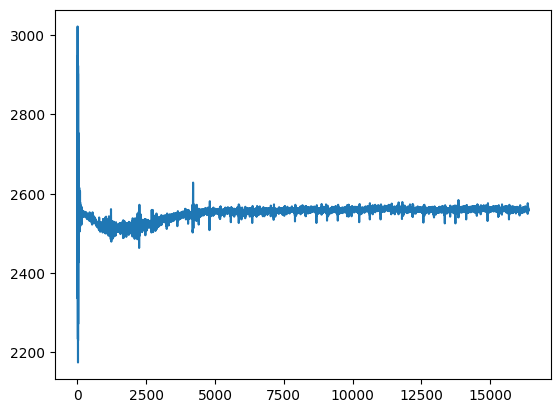

In [33]:
plt.plot(acq_res[10])

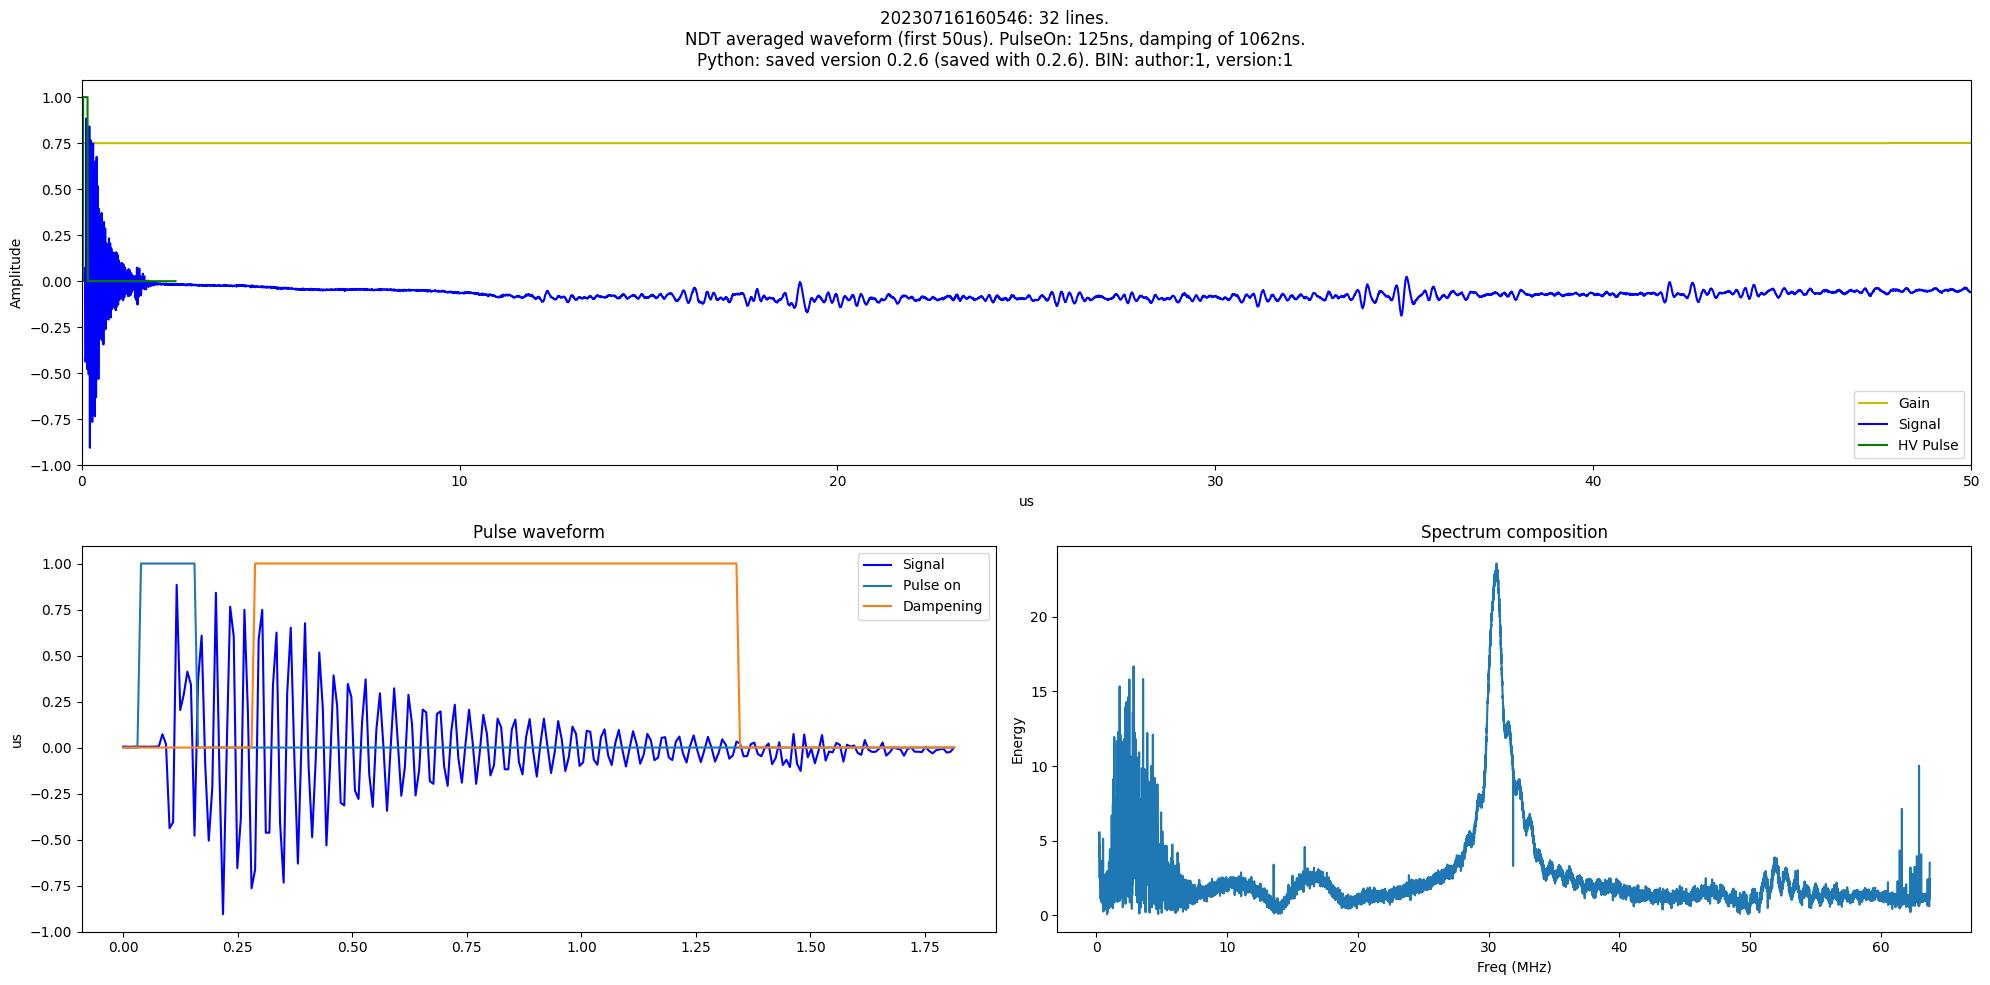

In [34]:
# And display it in more details
plot = USB.FView() 
plot.readfile('20230716160546.npz')